In [2]:
import numpy as np
from numpy.linalg import svd

# 将矩阵定义为二维numpy数组
A = np.array([[4, 0], [3, -5]])

U, S, VT = svd(A)
print("Original Matrix:")
print(A)
print("Left Singular Vectors:")
print(U)
print("Singular Values:") 
print(np.diag(S))
print("Right Singular Vectors:") 
print(VT)


Original Matrix:
[[ 4  0]
 [ 3 -5]]
Left Singular Vectors:
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
Singular Values:
[[6.32455532 0.        ]
 [0.         3.16227766]]
Right Singular Vectors:
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


In [3]:
print(U @ np.diag(S) @ VT)

[[ 4.00000000e+00 -1.11022302e-15]
 [ 3.00000000e+00 -5.00000000e+00]]


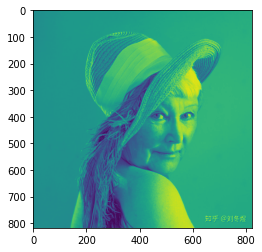

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./data/old.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)
plt.show()

In [5]:
U, S, VT = svd(img)
print("Left Singular Vectors:")
print(U.shape)
print("Singular Values:") 
print(np.diag(S).shape)
print("Right Singular Vectors:") 
print(VT.shape)

Left Singular Vectors:
(818, 818)
Singular Values:
(818, 818)
Right Singular Vectors:
(822, 822)


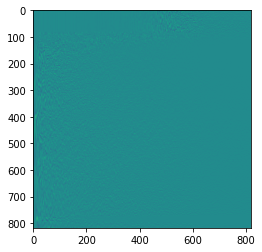

In [6]:
plt.imshow(U)

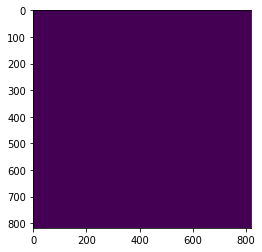

In [7]:
plt.imshow(np.diag(S))

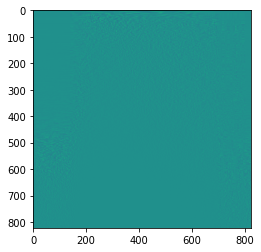

In [8]:
plt.imshow(VT)

In [9]:

# U.dot(np.diag(S)).dot(VT)

#### scikit-learn 计算截断 SVD

###### 一般情况下用sklearn.decomposition中的TruncatedSVD修剪我们的矩阵。可以将输出中所需的特征数指定为n_components参数。n_components 应严格小于输入矩阵中的特征数

In [10]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])

print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 1)
A_transf = svd.fit_transform(A)

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(A_transf)

A_transf.dot(svd.singular_values_)

Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]
Singular values:
[3.]
Transformed Matrix after reducing to 2 features:
[[-1.82725323]
 [ 2.27752656]
 [ 0.68848994]]


array([-5.48175968,  6.83257969,  2.06546983])

#### scikit-learn 计算随机 SVD

###### 随机 SVD 给出与截断 SVD 相同的结果，并且计算时间更快。截断 SVD 使用精确求解器 ARPACK，而随机 SVD 使用近似技术。

In [11]:
import numpy as np
from sklearn.utils.extmath import randomized_svd

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
u, s, vt = randomized_svd(A, n_components = 2)

print("Original Matrix:")
print(A)

print("Left Singular Vectors:")
print(u)

print("Singular Values:") 
print(np.diag(s))

print("Right Singular Vectors:") 
print(vt)

print("还原")
u.dot(np.diag(s)).dot(vt)

Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]
Left Singular Vectors:
[[ 0.73786479  0.10540926]
 [-0.42163702  0.84327404]
 [-0.52704628 -0.52704628]]
Singular Values:
[[3. 0.]
 [0. 3.]]
Right Singular Vectors:
[[-0.52704628  0.84327404  0.10540926]
 [ 0.52704628  0.42163702 -0.73786479]]
还原


/home/zhangmanman/anaconda3/envs/ResNetPytorch/lib/python3.7/site-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


array([[-1.00000000e+00,  2.00000000e+00,  6.10622664e-16],
       [ 2.00000000e+00,  0.00000000e+00, -2.00000000e+00],
       [-1.11022302e-16, -2.00000000e+00,  1.00000000e+00]])

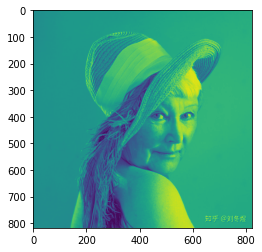

Original Matrix:
(818, 822)
Left Singular Vectors:
(818, 50)
Singular Values:
(50, 50)
Right Singular Vectors:
(50, 822)
还原


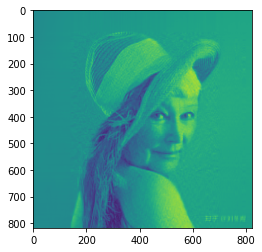

In [17]:
import numpy as np
from sklearn.utils.extmath import randomized_svd

A = img
plt.imshow(A)
plt.show()
u, s, vt = randomized_svd(A, n_components = 50)

print("Original Matrix:")
print(A.shape)

print("Left Singular Vectors:")
print(u.shape)

print("Singular Values:") 
print(np.diag(s).shape)

print("Right Singular Vectors:") 
print(vt.shape)

print("还原")


plt.imshow(u.dot(np.diag(s)).dot(vt))
plt.show()